In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from pathlib import Path

In [8]:
! pwd

/home/dsw/source/github/kaggle_cv/human_or_horse


In [9]:
image_dir = Path('/home/dsw/data/kaggle/horse-or-human/')
model_dir = '.'

In [19]:
image_dir

PosixPath('/home/dsw/data/kaggle/horse-or-human')

In [5]:
bs = 64
transforms = get_transforms(flip_vert=False, max_zoom=1.)
data = ImageDataBunch.from_folder(image_dir, valid='validation')

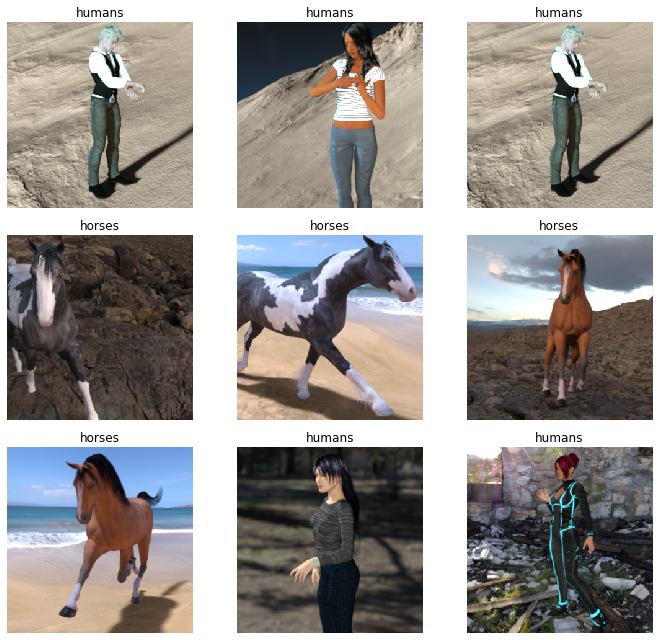

In [6]:
data.show_batch(rows=3, figsize=(10,9))

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['horses', 'humans'], 2, 1027, 256)

In [10]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, model_dir=model_dir)
learn.model = torch.nn.DataParallel(learn.model)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


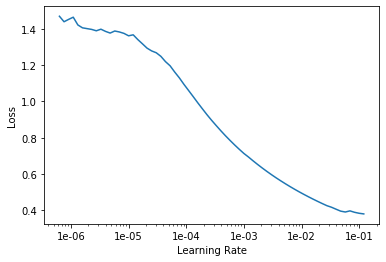

In [11]:
learn.lr_find()
learn.recorder.plot()

In [12]:
lr = 0.01

In [13]:
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.111846,0.000009,0.000000,00:06
1,0.047895,0.000077,0.000000,00:06
2,0.026710,0.000002,0.000000,00:06
3,0.024223,0.011345,0.003906,00:07
4,0.024098,0.000040,0.000000,00:06
5,0.017246,0.000012,0.000000,00:06
6,0.012966,0.000003,0.000000,00:06
7,0.011219,0.000001,0.000000,00:06
8,0.008039,0.000002,0.000000,00:06
9,0.008231,0.000003,0.000000,00:07


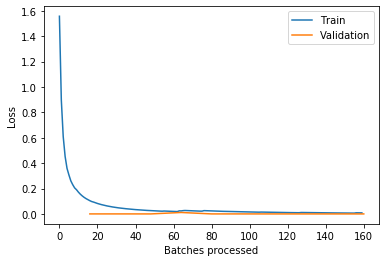

In [14]:
learn.recorder.plot_losses()

In [15]:
learn.save('horse_v_human-rn50')

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

In [18]:
interp.confusion_matrix()

array([[128,   0],
       [  0, 128]])

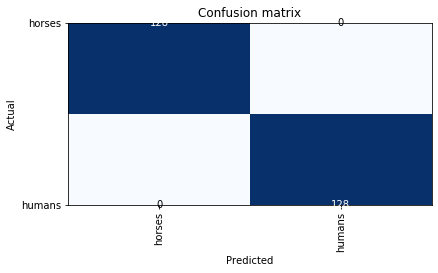

In [17]:
interp.plot_confusion_matrix()